In [1]:
import pandas as pd
from scripts import tt_impact as tt
from scripts import kb
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#kb_ = kb.get_kb_completeness()
#kb__ = kb.get_kb_impact_completeness()
tt.training_testing_completeness()
tt.evaluate_techniques()

abalone: 0.0
abalone: 0.022148038196720145
abalone: 0.0218614915368604
abalone: 0.02315490568012271
abalone: 0.016444886517951167
abalone: 0.02133865548942463
abalone: 0.019727116592745873
abalone: 0.020419287437965502
abalone: 0.022856197738431134
abalone: 0.0
abalone: 0.4347491618299904
abalone: 0.42396350760692775
abalone: 0.31694067926632385
abalone: 0.40919511522101054
abalone: 0.4519848063037917
abalone: 0.45202522000536843
abalone: 0.4483003881688008
abalone: 0.44685882687737727
abalone: 0.0
abalone: 0.016627922472874316
abalone: 0.016387284923461833
abalone: 0.025814225207634246
abalone: 0.015634700650161006
abalone: 0.014593387431503466
abalone: 0.014207481352695612
abalone: 0.01383634428788397
abalone: 0.014817092506891848
abalone: 0.0
abalone: 0.011021164211750239
abalone: 0.008252116503125706
abalone: 0.01675553540140608
abalone: 0.010249290434578598
abalone: 0.007800338623477905
abalone: 0.008036494732391245
abalone: 0.007346345811072027
abalone: 0.009190859111469255
abalo

In [2]:
import matplotlib.pyplot as plt

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [3]:
data = pd.read_csv("../results/prediction_completeness.csv")
data


,dataset,model,technique,rmse
0,abalone,DecisionTree,impute_standard,0.000000
1,abalone,DecisionTree,impute_mean,0.022148
2,abalone,DecisionTree,impute_median,0.021861
3,abalone,DecisionTree,impute_random,0.023155
4,abalone,DecisionTree,impute_knn,0.016445
...,...,...,...,...
1183,wall-robot-navigation,SVC,impute_knn,0.062331
1184,wall-robot-navigation,SVC,impute_mice,0.070249
1185,wall-robot-navigation,SVC,impute_linear_regression,0.063662
1186,wall-robot-navigation,SVC,impute_random_forest,0.060517


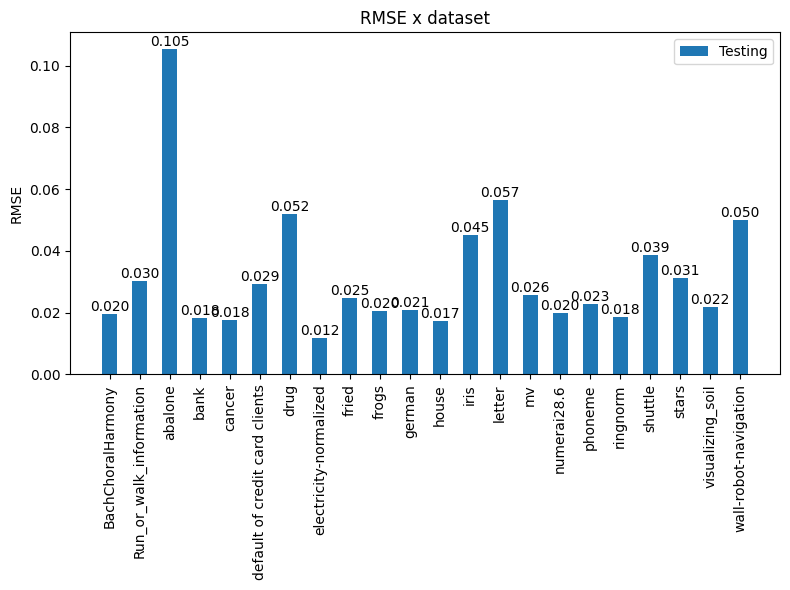

In [4]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

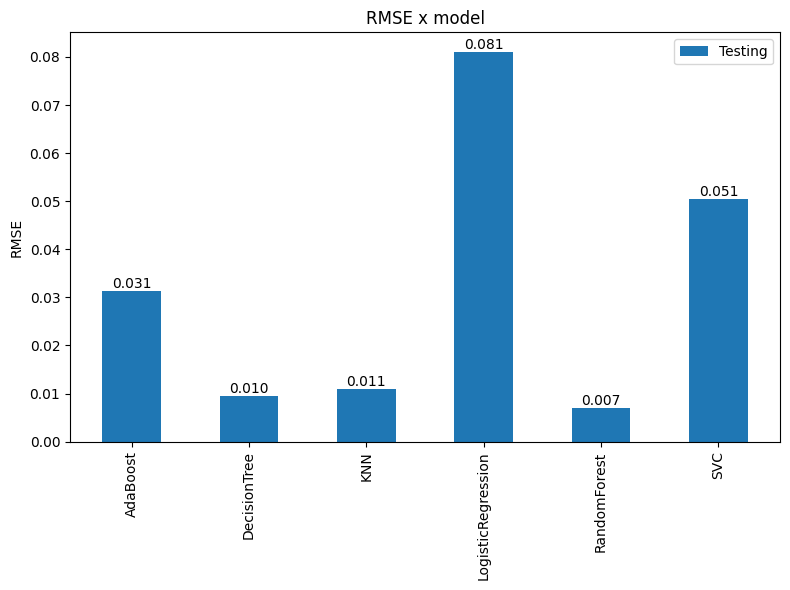

In [5]:
### performance per modello
df = data[['model','rmse']].groupby(['model']).mean().reset_index().copy()
bar_plot("RMSE x model",df.model.unique(),df.rmse)


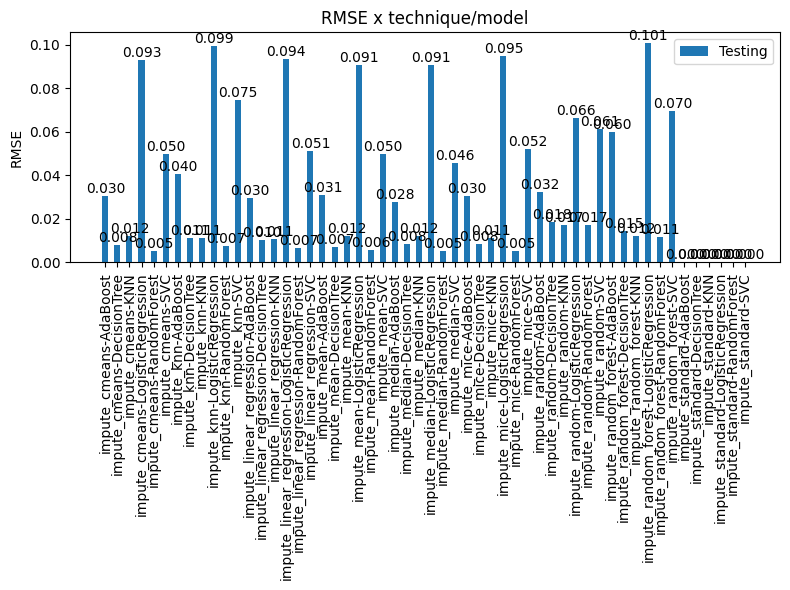

In [6]:
### performance per technique e modello
labels = []
for technique in np.sort(data.technique.unique()):
    for model in np.sort(data.model.unique()):
        labels.append(technique+"-"+model)

df = data[['technique','model','rmse']].groupby(['technique','model']).mean().reset_index().copy()
bar_plot("RMSE x technique/model",labels,df.rmse)

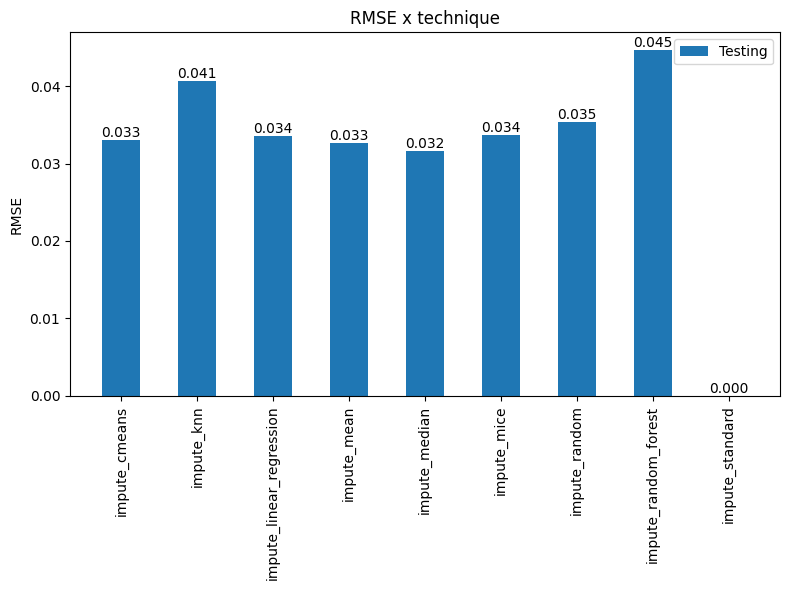

In [7]:
### performance per tecnica
df = data[['technique','rmse']].groupby(['technique']).mean().reset_index().copy()
bar_plot("RMSE x technique",df.technique.unique(),df.rmse)

In [8]:
len(data[data.rmse < 0.10])/len(data)

0.9368686868686869

In [9]:
len(data[data.rmse < 0.15])/len(data)

0.9646464646464646

In [10]:
len(data[data.rmse < 0.20])/len(data)

0.9890572390572391

In [11]:
len(data[data.rmse < 0.30])/len(data)

0.9932659932659933

In [12]:
data.rmse.mean()

np.float64(0.0317248181517502)

In [13]:
data.rmse.median()

np.float64(0.0136648944856018)